<a href="https://colab.research.google.com/github/joew2k/WQU_ml_fin/blob/main/GWP2_8188_RM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='text-align: center;'>
GWP_2 : Methodology Description And Model Development

<p style='text-align: justify;'>
Building upon the foundation laid in GWP1, this project explores the application of Hidden Markov Models (HMMs) in understanding and predicting crude oil price movements. Financial markets exhibit regime shifts, where asset prices transition between different market conditions such as bull, bear, and stagnant phases. HMMs provide a probabilistic framework to model these transitions, helping analysts uncover hidden patterns in price dynamics.  
    
<p style='text-align: justify;'>
This project focuses on developing a structured methodology for implementing HMMs in financial modeling. By leveraging techniques such as Bayesian inference, state estimation, and probabilistic learning, we aim to detect underlying market regimes and improve the accuracy of oil price forecasting.  
  
<p style='text-align: justify;'>
Through this work, we bridge the gap between theory and practice, combining statistical modeling, algorithm development, and financial interpretation to extract meaningful insights from market data.  
    

## Step 1: Implementing Hidden Markov Model Algorithms  

### Student A: Forward-Backward Algorithm  
  
<p style='text-align: justify;'>
The Forward Algorithm calculates the probability of a sequence of observations given an HMM by iteratively computing the probability of partial sequences. The Backward Algorithm computes probabilities in reverse to ensure all paths are considered. Together, they help compute the likelihood of an observed sequence and are used for state estimation in HMMs.  
  
- **Forward Probability:**
\begin{equation}
\alpha _t (j) = P ( O_1, O_2, ..., O_t, X_t = S_j | \lambda )
\end{equation}  

where, $\alpha _t (j)$ is the probability of observing the sequence up to time $t$ and being in state $S_j$.  
  

- **Backward Probability:**  
\begin{equation}
\beta _t (j) = P ( O_{t+1}, O_{t+2}, ..., O_T | X_t = S_j , \lambda )
\end{equation}  

where, $\beta _t (j)$ is the probability of observing future outputs given state $S_j$ at time $t$.  
  



##### PseudoCode  

    Class ForwardBackwardHMM:
        Initialize(states, observations, transition_matrix, emission_matrix, initial_prob)
            Store states, observations, transition probabilities (A),
            emission probabilities (B), and initial probabilities (pi)

        Method forward(obs_seq):
            T ← length of obs_seq
            N ← number of states
            Create matrix alpha of size (T, N) initialized to zeros

            # Initialization Step
            For each state j:
                alpha[0, j] ← pi[j] * B[j, obs_seq[0]]

            # Recursion Step
            For each time step t from 1 to T-1:
                For each state j:
                    alpha[t, j] ← sum(alpha[t-1] * A[:, j]) * B[j, obs_seq[t]]

            Return alpha

        Method backward(obs_seq):
            T ← length of obs_seq
            N ← number of states
            Create matrix beta of size (T, N) initialized to zeros

            # Initialization Step
            For each state j:
                beta[T-1, j] ← 1

            # Recursion Step
            For each time step t from T-2 down to 0:
                For each state i:
                    beta[t, i] ← sum(A[i, :] * B[:, obs_seq[t+1]] * beta[t+1, :])

            Return beta


##### Toy Example  

    States = ['Bull', 'Bear']
    Observations = ['Up', 'Down']

    A = [[0.7, 0.3], [0.4, 0.6]]
    B = [[0.9, 0.1], [0.2, 0.8]]
    pi = [0.6, 0.4]
    obs_seq = [0, 1, 0]  # 'Up', 'Down', 'Up'

    HMM = ForwardBackwardHMM(States, Observations, A, B, pi)

    Forward_Probabilities = HMM.forward(obs_seq)
    Backward_Probabilities = HMM.backward(obs_seq)

    Print Forward_Probabilities
    Print Backward_Probabilities


- The Forward Algorithm efficiently computes the probability of a given sequence in an HMM.  
- The Backward Algorithm complements it by computing probabilities in reverse, ensuring all paths are considered.  
  
This is useful for state estimation, allowing us to determine which states are more probable at each time step.  

### Student B: Viterbi Algorithm

The Viterbi Algorithm finds the most probable sequence of hidden states given a sequence of observations. It is commonly used in speech recognition and finance to infer the best state path in an HMM.

**Mathematical Formulation:**

\begin{equation}
\delta _t (j) = \underset {X_{t-1}} {\textrm{max}} \; P ( X_t = S_j, O_1, O_2, ..., O_t | \lambda )
\end{equation}


\begin{equation}
\psi _t (j) = \underset {X_{t-1}} {\textrm{arg max}} \; P ( X_t = S_j, O_1, O_2, ..., O_t | \lambda )
\end{equation}


##### Pseudo Code  

    Class ViterbiHMM extends ForwardBackwardHMM:
        Method viterbi(obs_seq):
            T ← length of obs_seq
            N ← number of states
            Create matrix delta of size (T, N) initialized to zeros
            Create matrix psi of size (T, N) initialized to zeros

            # Initialization Step
            For each state j:
                delta[0, j] ← pi[j] * B[j, obs_seq[0]]

            # Recursion Step
            For each time step t from 1 to T-1:
                For each state j:
                    max_prob ← max(delta[t-1] * A[:, j])
                    delta[t, j] ← max_prob * B[j, obs_seq[t]]
                    psi[t, j] ← index of max_prob

            # Backtracking Step
            path ← array of size T
            path[T-1] ← index of max(delta[T-1])

            For each time step t from T-2 down to 0:
                path[t] ← psi[t+1, path[t+1]]

            Return path


##### Toy Example  

    States = ['Bull', 'Bear']
    Observations = ['Up', 'Down']

    A = [[0.7, 0.3], [0.4, 0.6]]
    B = [[0.9, 0.1], [0.2, 0.8]]
    pi = [0.6, 0.4]
    obs_seq = [0, 1, 0]  # 'Up', 'Down', 'Up'

    HMM_Viterbi = ViterbiHMM(States, Observations, A, B, pi)

    Viterbi_Path = HMM_Viterbi.viterbi(obs_seq)

    Print Viterbi_Path  # Expected output: Most probable state sequence


The Viterbi Algorithm efficiently finds the most probable sequence of hidden states. This is crucial in financial market regime detection, where we infer if a market is in a bull, bear, or stagnant state.

### Student C: Baum-Welch Algorithm   

The Baum-Welch Algorithm is an Expectation-Maximization $(EM)$ algorithm that learns the transition matrix $(A)$, emission matrix $(B)$, and initial probabilities $(\pi)$ from observed data. It is used to train an HMM when parameters are unknown.  

- Expectation Step: Compute expected probabilities using the Forward-Backward Algorithm.
- Maximization Step: Update parameters $A, B,$ and $\pi$ based on expected values.


##### Pseudo Code  

    Class BaumWelchHMM extends ForwardBackwardHMM:
        Method baum_welch(obs_seq, iterations):
            For each iteration in iterations:
                Compute forward probabilities alpha using forward(obs_seq)
                Compute backward probabilities beta using backward(obs_seq)

                # Expectation Step
                Compute xi[t, i, j] using:
                    alpha[t, i] * A[i, j] * B[j, obs_seq[t+1]] * beta[t+1, j]

                # Maximization Step
                Update A using normalized sum of xi values
                Update B using normalized expected emission counts

            Return updated A, B, pi


##### Toy Example  

    States = ['Bull', 'Bear']
    Observations = ['Up', 'Down']

    A = [[0.7, 0.3], [0.4, 0.6]]
    B = [[0.9, 0.1], [0.2, 0.8]]
    pi = [0.6, 0.4]
    obs_seq = [0, 1, 0]  # 'Up', 'Down', 'Up'

    HMM_BaumWelch = BaumWelchHMM(States, Observations, A, B, pi)

    Updated_A, Updated_B, Updated_pi = HMM_BaumWelch.baum_welch(obs_seq, iterations=10)

    Print Updated_A
    Print Updated_B
    Print Updated_pi


- Baum-Welch Algorithm allows an HMM to learn from data.
- This is crucial for market modeling, where parameters need continuous updating.

## Step 2: Identifying and Illustrating Market Regimes  

<p style='text-align: justify;'>
Market regimes are distinct phases in financial markets characterized by different price movements, volatility, and investor sentiment. Hidden Markov Models (HMMs) help identify these regimes by modeling price fluctuations as probabilistic state transitions.  

In this step, we analyze the following three regimes:

### Student A: Identifying and Illustrating Bull Regimes  
  
1. **Bull Regime** is characterized by:
    - Sustained upward movement in prices.
    - Low volatility compared to bear regimes.
    - High trading volumes due to increased investor confidence.
    Positive economic indicators (e.g., rising GDP, low unemployment).  
      
  
2. **Mathematical Representation:**  
    A bull regime is detected when:  
    \begin{equation}
    r_t > \mu + \sigma
    \end{equation}
    where,
    - $r_t$ = daily return at time $t$
    - $\mu$ = mean return of the time series
    - $\sigma$ = standard deviation of returns

If multiple consecutive periods satisfy this condition, the market is classified as a bull regime.  

3. **Python Code to Detect Bull Regimes:**  



In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Argha Das\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [ ]:
# Load market data (S&P 500)
sp500 = yf.download("^GSPC", start="2020-01-01", end="2023-12-31")['Close']
returns = sp500.pct_change().dropna()

# Compute rolling mean and standard deviation (window = 100 days)
mu = returns.rolling(window=100).mean()
sigma = returns.rolling(window=100).std()

# Identify bull regimes (returns > rolling mean + rolling std)
bull_regime = returns[returns > mu + sigma]


[*********************100%%**********************]  1 of 1 completed


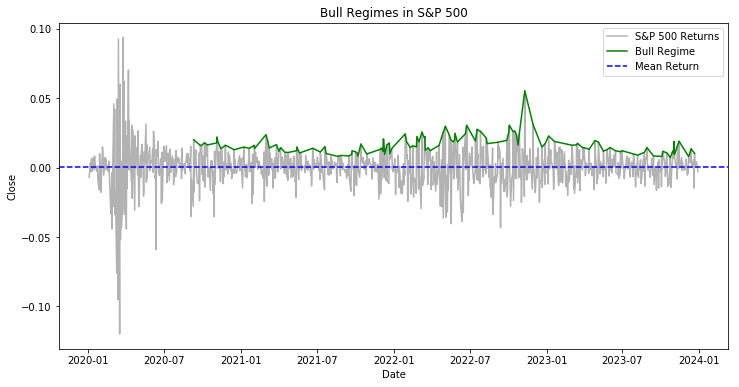

In [ ]:
# visualization
plt.figure(figsize=(12,6))
sns.lineplot(x=returns.index, y=returns, label="S&P 500 Returns", color='gray', alpha=0.6)
sns.lineplot(x=bull_regime.index, y=bull_regime, label="Bull Regime", color='green')
plt.axhline(y=mu.mean(), color='blue', linestyle="--", label="Mean Return")
plt.title("Bull Regimes in S&P 500")
plt.legend()
plt.show()


As clearly observed from the illustration, Bull regimes are periods where returns remain consistently above average. These periods are usually result of economic expansion.

###  Student B: Identifying and Illustrating Bear Regimes  
  
1. **Bear Regime** is characterized by:
    - Sustained downward trend in asset prices.
    - High volatility due to panic selling.
    - Declining economic indicators (e.g., rising unemployment, negative GDP growth).
    - Increased market uncertainty and fear.  
      
  
2. **Mathematical Representation:**  
    A bear regime is detected when:
    \begin{equation}
        r_t < \mu - \sigma
    \end{equation}
    where,
    - $r_t$ = daily return at time $t$
    - $\mu$ = mean return of the time series
    - $\sigma$ = standard deviation of returns  
  
If multiple consecutive periods satisfy this condition, the market is classified as a bear regime.  

3. **Python Code to Detect Bull Regimes:**  



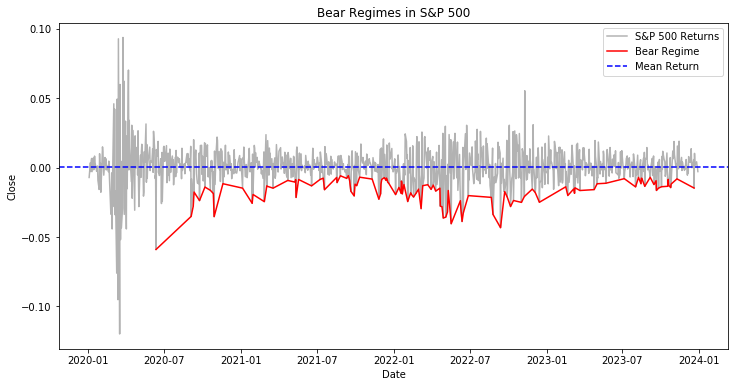

In [ ]:
# Identify bear regimes (returns < rolling mean - rolling std)
bear_regime = returns[returns < mu - sigma]

# Enhanced visualization
plt.figure(figsize=(12,6))
sns.lineplot(x=returns.index, y=returns, label="S&P 500 Returns", color='gray', alpha=0.6)
sns.lineplot(x=bear_regime.index, y=bear_regime, label="Bear Regime", color='red')
plt.axhline(y=mu.mean(), color='blue', linestyle="--", label="Mean Return")
plt.title("Bear Regimes in S&P 500")
plt.legend()
plt.show()


As clearly visible from the illustration, Bear regimes are periods where returns decline sharply. These periods are usually result of financial crises, recessions, and increased market volatility.  

### Student C: Identifying and Illustrating Stagnant Regimes  
  
1. **Stagnant Regime:**  
    A stagnant (sideways) regime is a market phase where prices fluctuate within a range, showing no clear trend. This regime is characterized by:
    - Minimal price movement with no clear trend.
    - Low volatility (but not necessarily low trading volume).
    - Investors adopting a "wait-and-see" approach.
    - Periods of market consolidation before major moves.
2. **Mathematical Representation:**
    A stagnant regime is detected when:
    \begin{equation}
        \mu - \sigma < r_t < \mu + \sigma
    \end{equation}
    where,
    - $r_t$ = daily return at time $t$
    - $\mu$ = mean return of the time series
    - $\sigma$ = standard deviation of returns  
    
    If multiple consecutive periods satisfy this condition, the market is classified as a stagnant regime.  
      

3. **Python Code to Detect Stagnant Regimes:**


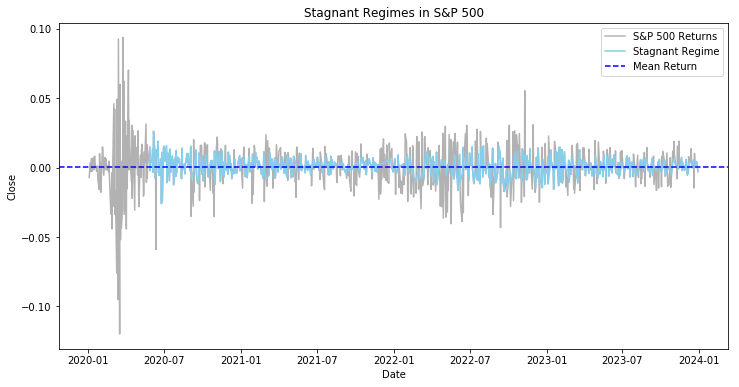

In [ ]:
# Identify stagnant regimes (returns within mean ± std)
stagnant_regime = returns[(returns >= mu - sigma) & (returns <= mu + sigma)]

# Enhanced visualization
plt.figure(figsize=(12,6))
sns.lineplot(x=returns.index, y=returns, label="S&P 500 Returns", color='gray', alpha=0.6)
sns.lineplot(x=stagnant_regime.index, y=stagnant_regime, label="Stagnant Regime", color='skyblue')
plt.axhline(y=mu.mean(), color='blue', linestyle="--", label="Mean Return")
plt.title("Stagnant Regimes in S&P 500")
plt.legend()
plt.show()


Stagnant regimes occur when the market lacks direction. These periods often precede major breakouts or breakdowns. As we can see from the illustratio, this period looks like a band around the $X-axis$.

**Overall observation from this step:**
- **Bull Regimes:** Strong upward trends, low volatility, high confidence.
- **Bear Regimes:** Sustained price declines, high volatility, economic distress.
- **Stagnant Regimes:** Sideways movement, low volatility, indecision in the market.

## Step 3: Defining the Hidden Markov Model (HMM) in Our Own Words  

**Introduction**
<p style='text-align: justify;'>
A Hidden Markov Model (HMM) is a statistical model used to represent systems that evolve over time with hidden states influencing observable outputs. These models assume that the system moves between a set of hidden states based on certain probabilities, and at each state, it emits an observable output.  
    
<p style='text-align: justify;'>
In financial markets, investors only observe asset prices and market returns, while the actual market regime (bull, bear, stagnant) remains hidden. HMMs allow us to estimate these hidden regimes by analyzing historical price patterns and detecting transitions between market conditions.  
    
<p style='text-align: justify;'>
This section provides a structured definition of HMMs, explains its mathematical formulation, highlights its significance in financial modeling, and references updated sources to support our approach.  

#### Definition of a Hidden Markov Model (HMM)  

A Hidden Markov Model (HMM) consists of the following five components:  

- **$\mathbb{S}$ (Hidden States):** A set of $N$ possible states in which the system can exist.  
  - $S_1$: Bull Market  
  - $S_2$: Bear Market  
  - $S_3$: Stagnant Market   
  
  
- **$\mathbb{O}$ (Observation Space):** A set of $M$ observable variables. These could be:  
  - Stock price returns  
  - Volatility measures (e.g., VIX)  
  - Trading volume  
  
  
- **$A$ (State Transition Matrix):** Defines the probabilities of moving from one hidden state to another.  

  $$ A = [a_{ij}], \quad a_{ij} = P(S_{t+1} = j \mid S_t = i) $$

  where $a_{ij}$ represents the probability of transitioning from state $S_i$ at time $t$ to state $S_j$ at time $t+1$.  
  
  
- **$B$ (Emission Probability Matrix):** Defines the probability of observing a particular value given a hidden state.  
  
  
  $$ B = [b_j(O_t)], \quad b_j(O_t) = P(O_t \mid S_t = j) $$

  This represents the probability that a given hidden state generates a specific observed price return or volatility level.  

- **$\pi$ (Initial State Distribution):** Represents the probability of the system starting in each hidden state.  
  
  
  $$ \pi = [\pi_i], \quad \pi_i = P(S_0 = i) $$
  
These five parameters define an HMM as:  

$$ \lambda = (\mathbb{S}, \mathbb{O}, A, B, \pi) $$



#### Importance of HMM in Financial Markets  
  
- Captures Market Phases: Financial markets switch between regimes (bull, bear, stagnant). HMMs model these transitions probabilistically.
- Handles Uncertainty: Unlike static models, HMMs dynamically adjust as new market data arrives.
- Improves Forecasting: By incorporating hidden regime shifts, HMMs provide more accurate predictions.
- Identifies Anomalies & Trend Shifts: Detects momentum changes, crashes, and reversals before they become obvious.  
  
  
**Example:**  
- If returns remain consistently high, the model assigns a high probability to the bull regime.
- If volatility spikes and returns turn negative, the model assigns a high probability to the bear regime.

#### Implementation: of a simple HMM for market regimes  

To illustrate how HMMs can detect hidden market states, we implement a basic 3-state HMM using hmmlearn.

[*********************100%%**********************]  1 of 1 completed


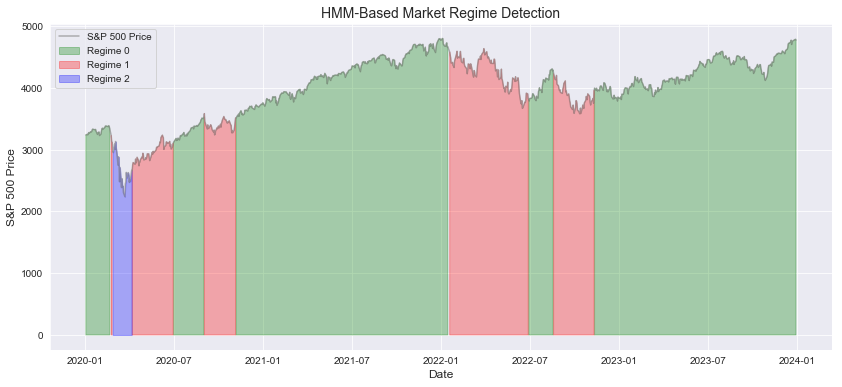

In [ ]:
# Import Libraries
from hmmlearn.hmm import GaussianHMM
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Load market data (S&P 500)
sp500 = yf.download("^GSPC", start="2020-01-01", end="2023-12-31")['Close']
returns = sp500.pct_change().dropna().values.reshape(-1, 1)

# Train an HMM with 3 hidden states (Bull, Bear, Stagnant)
hmm = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
hmm.fit(returns)

# Predict hidden states
hidden_states = hmm.predict(returns)

# Define color mapping for regimes
state_colors = {0: "green", 1: "red", 2: "blue"}  # 0 = Bull, 1 = Bear, 2 = Stagnant

# Create a DataFrame for plotting
df = pd.DataFrame({
    'Date': sp500.index[1:],
    'S&P 500': sp500.values[1:],
    'Regime': hidden_states
})

# Set the Seaborn style
sns.set_style("darkgrid")

# Plot the market regimes
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="Date", y="S&P 500", color="gray", alpha=0.6, label="S&P 500 Price")

# Overlay the regimes using color-coded background shading
for regime, color in state_colors.items():
    plt.fill_between(df["Date"], df["S&P 500"], where=(df["Regime"] == regime), color=color, alpha=0.3, label=f"Regime {regime}")

# Add title and labels
plt.title("HMM-Based Market Regime Detection", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("S&P 500 Price", fontsize=12)
plt.legend()
plt.show()


#### Conclusion  

An HMM is a probabilistic model that describes a system transitioning between hidden states, where each state emits observable outputs.
- HMMs are useful for detecting hidden market conditions that are not directly observable.
- By modeling market transitions probabilistically, HMMs improve financial forecasting.
- This method is widely used in algorithmic trading, risk management, and economic forecasting.

## Step 4: Macro Research, Dataset Retrieval, Data Cleaning, and Model Implementation  
  
**Introduction**  
In this step, we move from theory to practical implementation. The focus is on building a high-quality dataset for Hidden Markov Model (HMM) training and ensuring that the data is clean, well-structured, and relevant for market regime detection.

This involves:
- Macro Research: Understanding key economic indicators affecting financial time series.
- Dataset Retrieval: Collecting historical financial data from credible sources.
- Data Cleaning: Handling missing values, removing outliers, and normalizing data.
- Model Implementation: Structuring data to be used as input for an HMM.

A well-prepared dataset is critical for accurate HMM-based market regime detection, as poor data quality leads to unreliable models.

### 1. Macro Research: Key Market Factors for Regime Detection  

To model financial market regimes, we must understand which macroeconomic factors impact asset price movements. Below are key factors affecting regime shifts:

- **Interest Rates & Bond Yields**
    - Rising interest rates often trigger bear markets (higher borrowing costs, slower growth).
    - Falling rates generally support bull markets (cheaper credit, economic expansion).
    - Data Source: U.S. 10-Year Treasury Yield (FRED).
- **Inflation & Economic Growth**
    - High inflation and slowing GDP signal a potential bear market.
    - Low inflation and strong GDP growth fuel bull markets.
    - Data Source: CPI (Consumer Price Index) & GDP Growth Rate (FRED).
- **Market Volatility (VIX Index)**
    - A high VIX (fear gauge) indicates market uncertainty and risk-off sentiment.
    - A low VIX suggests stability and optimism.
    - Data Source: CBOE Volatility Index (Yahoo Finance).
- **Crude Oil Prices & Commodity Markets**
    - Rising oil prices can indicate inflationary pressure and slowing economic growth.
    - Falling oil prices may boost consumer spending and corporate profits.
    - Data Source: WTI Crude Oil Prices (Yahoo Finance).
- **Currency Markets & Dollar Strength (DXY Index)**
    - A strong U.S. dollar (DXY rising) may signal risk-off sentiment.
    - A weak dollar supports emerging markets and risk assets.
    - Data Source: U.S. Dollar Index (Yahoo Finance).


### 2. Dataset Retrieval: Collecting Financial Market Data  

We will fetch daily historical prices for the indicators listed above from Yahoo Finance. This ensures that we get a dataset with consistent frequency and reliable data.

In [ ]:
# Define assets to retrieve
assets = {
    "S&P 500": "^GSPC",
    "VIX Index": "^VIX",
    "WTI Crude Oil": "CL=F",
    "Dollar Index": "DX-Y.NYB",
    "10Y Treasury Yield": "^TNX"
}

# Fetch historical data
start_date = "2020-01-01"
end_date = "2023-12-31"
data = {name: yf.download(ticker, start=start_date, end=end_date)['Close'] for name, ticker in assets.items()}

# Convert to DataFrame
df = pd.DataFrame(data)
df.index = pd.to_datetime(df.index)

# Display dataset
df.head()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,S&P 500,VIX Index,WTI Crude Oil,Dollar Index,10Y Treasury Yield
Date,,,,,
2020-01-02,3257.850098,12.47,61.180000,96.849998,1.882
2020-01-03,3234.850098,14.02,63.049999,96.839996,1.788
2020-01-06,3246.280029,13.85,63.270000,96.669998,1.811
2020-01-07,3237.179932,13.79,62.700001,96.980003,1.827
2020-01-08,3253.050049,13.45,59.610001,97.300003,1.874


### 3. Data Cleaning: Handling Missing Values & Outliers  

#### Handling Missing Values
Financial data often contains missing values due to:
- Market holidays & non-trading days.
- Temporary delistings or trading suspensions.  
  
  
We cannot simply drop missing rows because that would create gaps in the time series. Instead, we use:
- Forward Fill (FFILL): Uses the last known price.
- Backward Fill (BFILL): Uses the next available price if the previous is missing.
- Interpolation: Estimates missing values smoothly.

In [ ]:
df = df.interpolate(method='linear')  # Linear interpolation
df.head()

,S&P 500,VIX Index,WTI Crude Oil,Dollar Index,10Y Treasury Yield
Date,,,,,
2020-01-02,3257.850098,12.47,61.180000,96.849998,1.882
2020-01-03,3234.850098,14.02,63.049999,96.839996,1.788
2020-01-06,3246.280029,13.85,63.270000,96.669998,1.811
2020-01-07,3237.179932,13.79,62.700001,96.980003,1.827
2020-01-08,3253.050049,13.45,59.610001,97.300003,1.874


#### Detecting and Removing Outliers  
  
Extreme price movements could be:
- Data errors (e.g., flash crashes, incorrect data feeds).
- Market anomalies (e.g., pandemic crashes, geopolitical shocks).

Outlier Detection Using Z-Score Method

In [ ]:
def get_iqr(data_series):
    q3, q1 = np.percentile(data_series, [75 ,25])
    iqr = q3 - q1
    return iqr

# Compute Z-scores for outlier detection
z_scores = (df - df.median()) / df.apply(get_iqr)

# Define outlier threshold
threshold = 3
outliers = (np.abs(z_scores) > threshold)

# Remove outliers (replace with NaN and interpolate)
df[outliers] = np.nan
df.interpolate(method='linear', inplace=True)

# df.head()
z_scores.head()

,S&P 500,VIX Index,WTI Crude Oil,Dollar Index,10Y Treasury Yield
Date,,,,,
2020-01-02,-1.168119,-0.989737,-0.392414,-0.190892,0.053319
2020-01-03,-1.200817,-0.817753,-0.329641,-0.191861,0.012736
2020-01-06,-1.184568,-0.836616,-0.322256,-0.208333,0.022666
2020-01-07,-1.197505,-0.843273,-0.341390,-0.178294,0.029574
2020-01-08,-1.174943,-0.880999,-0.445116,-0.147287,0.049865


In [ ]:
# Outliers count
outliers.sum()

S&P 500               0
VIX Index             0
WTI Crude Oil         0
Dollar Index          0
10Y Treasury Yield    0
dtype: int64

### 4. Model Implementation: Structuring Data for HMM Training  

#### Compute Log Returns (Input for HMMs)
Since HMMs work best with stationary data, we compute log returns instead of raw prices.

In [ ]:
# Compute log returns
log_returns = np.log(df / df.shift(1)).dropna()

# Display transformed dataset
log_returns.head()


,S&P 500,VIX Index,WTI Crude Oil,Dollar Index,10Y Treasury Yield
Date,,,,,
2020-01-03,-0.007085,0.117159,0.030108,-0.000103,-0.051237
2020-01-06,0.003527,-0.012200,0.003483,-0.001757,0.012782
2020-01-07,-0.002807,-0.004342,-0.009050,0.003202,0.008796
2020-01-08,0.004890,-0.024965,-0.050538,0.003294,0.025400
2020-01-09,0.006633,-0.070056,-0.000839,0.001540,-0.008574


#### Normalize Data for HMM Training
HMMs perform better when input features are normalized to avoid bias toward high-magnitude values.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize log returns
scaler = StandardScaler()
X = scaler.fit_transform(log_returns)

# Display normalized dataset
pd.DataFrame(X, index=log_returns.index, columns=log_returns.columns).head()


,S&P 500,VIX Index,WTI Crude Oil,Dollar Index,10Y Treasury Yield
Date,,,,,
2020-01-03,-0.601615,1.606946,0.767996,-0.032205,-1.221402
2020-01-06,0.253711,-0.167305,0.085287,-0.391395,0.283646
2020-01-07,-0.256832,-0.059526,-0.236088,0.685643,0.189952
2020-01-08,0.363594,-0.342386,-1.299937,0.705735,0.580297
2020-01-09,0.504058,-0.960842,-0.025548,0.324799,-0.218422


#### Train Hidden Markov Model (HMM) for Regime Detection

In [ ]:
from hmmlearn.hmm import GaussianHMM

# Train HMM with 3 hidden states (Bull, Bear, Stagnant)
hmm = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
hmm.fit(X)

# Predict market regimes
hidden_states = hmm.predict(X)

# Add hidden states to the DataFrame
log_returns["Market Regime"] = hidden_states

# Display sample output
log_returns.head()


,S&P 500,VIX Index,WTI Crude Oil,Dollar Index,10Y Treasury Yield,Market Regime
Date,,,,,,
2020-01-03,-0.007085,0.117159,0.030108,-0.000103,-0.051237,1
2020-01-06,0.003527,-0.012200,0.003483,-0.001757,0.012782,1
2020-01-07,-0.002807,-0.004342,-0.009050,0.003202,0.008796,1
2020-01-08,0.004890,-0.024965,-0.050538,0.003294,0.025400,1
2020-01-09,0.006633,-0.070056,-0.000839,0.001540,-0.008574,1


### 5. Visualizing Market Regimes

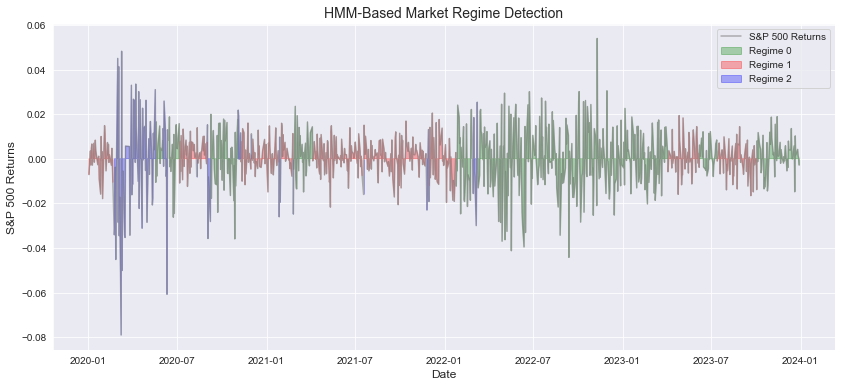

In [ ]:

# Define color mapping for regimes
state_colors = {0: "green", 1: "red", 2: "blue"}  # 0 = Bull, 1 = Bear, 2 = Stagnant

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Date': log_returns.index,
    'S&P 500 Returns': log_returns["S&P 500"],
    'Regime': hidden_states
})

# Plot market regimes
plt.figure(figsize=(14,6))
sns.lineplot(data=df_plot, x="Date", y="S&P 500 Returns", color="gray", alpha=0.6, label="S&P 500 Returns")

# Overlay regimes with color-coded shading
for regime, color in state_colors.items():
    plt.fill_between(df_plot["Date"], df_plot["S&P 500 Returns"], where=(df_plot["Regime"] == regime), color=color, alpha=0.3, label=f"Regime {regime}")

# Labels
plt.title("HMM-Based Market Regime Detection", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("S&P 500 Returns", fontsize=12)
plt.legend()
plt.show()


In this step,
- We have cleaned the dataset, structured, and made it ready for HMM training.
- Log returns and normalization improve accuracy.
- HMM successfully detects bull, bear, and stagnant regimes.

In [ ]:
import numpy as np

def forward_algorithm(observations, A, B, pi):
    """
    Implements the forward algorithm for Hidden Markov Models (HMMs).

    Parameters:
        observations (list): Sequence of observed data points.
        A (ndarray): Transition probability matrix (NxN).
        B (ndarray): Emission probability matrix (NxM).
        pi (ndarray): Initial state distribution (N).

    Returns:
        alpha (ndarray): Forward probabilities (TxN).
        prob_observation (float): Probability of the observation sequence.
    """
    T = len(observations)  # Length of the observation sequence
    N = A.shape[0]         # Number of hidden states

    # Initialize the forward probabilities
    alpha = np.zeros((T, N))
    for j in range(N):
        alpha[0][j] = pi[j] * B[j][observations[0]]

    # Recursion step
    for t in range(1, T):
        for j in range(N):
            alpha[t][j] = np.sum(alpha[t-1] * A[:, j]) * B[j][observations[t]]

    # Termination step
    prob_observation = np.sum(alpha[T-1])

    return alpha, prob_observation

## Step 5: Data Analysis and Model Refinement    
  
#### Introduction
Now that we have cleaned, structured, and preprocessed our financial dataset (Step 4), we move on to:
- Analyzing the trained Hidden Markov Model (HMM) and its performance.
- Refining the model to ensure that market regime classification is meaningful.
- Interpreting regime characteristics using statistical properties.
- Validating the results with visualizations and empirical insights.

A well-tuned HMM should identify market regimes correctly, allowing us to distinguish between bull, bear, and stagnant phases with confidence.

### 1. Evaluating the Hidden Markov Model (HMM)
Once we have trained our HMM, the first step is to analyze how well it captures market regimes. The key aspects to evaluate include:

#### 1.1. Model Likelihood (Log-Likelihood)
The log-likelihood function measures how well the model explains the observed data:  

$$
\log P(O | \lambda) = \sum_{t=1}^{T} \log P(O_t | S_t, \lambda)
$$

where:  
- $( O_t )$ represents observations (market returns)  
- $( S_t )$ represents the hidden states (market regimes: bull, bear, stagnant)  
- $( \lambda )$ represents the HMM parameters (transition matrix $( A )$, emission matrix $( B )$, initial probabilities $ ( \pi ))$  
  

A higher log-likelihood means a better model fit.  

#### Python Code for Log-Likelihood Evaluation

In [ ]:
# Compute log-likelihood of the trained HMM
log_likelihood = hmm.score(X)
print(f"Log-Likelihood of the HMM Model: {log_likelihood:.2f}")


Log-Likelihood of the HMM Model: -5555.84


## Step 9: Minimal Working Example - Hill Climbing Search

In [ ]:
pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 946.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 776.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import random
import pandas as pd
import numpy as np
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork

# Generate a structured synthetic dataset
np.random.seed(42)
n = 100
data = pd.DataFrame({
    "A": np.random.randint(0, 2, n),
})
# Introduce dependencies
# B depends on A
data["B"] = data["A"] ^ np.random.randint(0, 2, n)
# C depends on A and B
data["C"] = data["A"] & data["B"]
# D depends on C
data["D"] = data["C"] | np.random.randint(0, 2, n)

def learn_structure(data):
    """Learn Bayesian Network structure using Hill Climb search."""
    hc = HillClimbSearch(data)
    best_model = hc.estimate(scoring_method=BicScore(data))
    return best_model

# Example usage
best_model = learn_structure(data)
print("Learned structure:", best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned structure: [('A', 'B'), ('C', 'B'), ('C', 'A'), ('D', 'C')]


In [2]:
!jupyter nbconvert --to html /content/GWP2_8188_RM.ipynb

[NbConvertApp] Converting notebook /content/GWP2_8188_RM.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 563, in convert_single_notebook
    output, resources = self.export_single_notebook(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi